**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but unfortunately there a couple of small problems that need to be fixed before the project is accepted. It should be pretty straightforward though!

<div class="alert alert-info">
  Hi, my name is Yonatan,
    
  Thank you for reviewing my project :)
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
You're welcome! There's still a problem with filling missing targets in the test set (see comment below), should be easy to fix :)
	  
</div>

# Project description
The data is stored in three files:

* `gold_recovery_train.csv` — training dataset 
* `gold_recovery_test.csv` — test dataset 
* `gold_recovery_full.csv` — source dataset 

Data is indexed with the date and time of acquisition (`date` feature). Parameters that are next to each other in terms of time are often similar.

Some parameters are not available because they were measured and/or calculated much later. That's why, some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.

The source dataset contains the training and test sets with all the features.

You have the raw data that was only downloaded from the warehouse. Before building the model, check the correctness of the data. For that, use our instructions.


## Technological Process
![Alt text](https://pictures.s3.yandex.net/resources/ore_1591699963.jpg) 


## Recovery calculation
You need to simulate the process of recovering gold from gold ore.

Use the following formula to simulate the recovery process:
![Alt text](https://pictures.s3.yandex.net/resources/Recovery_1576238822_1589899219.jpg) 

where:

* C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
* F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
* T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

To predict the coefficient, you need to find the share of gold in the concentrate and the tails. Note that both final and rougher concentrates matter.


## Project instructions
### Prepare the data
#### Open the files and look into the data.

In [16]:
! pip install sidetable

Defaulting to user installation because normal site-packages is not writeable


##### Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sidetable as stb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [18]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv') 
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

dfs = [df_train, df_test, df_full]
dfs_names = ['df_train', 'df_test', 'df_full']

In [19]:
for i in range(3):
    display(dfs_names[i]+':')
    display(dfs[i].head(1))
    print()

'df_train:'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


'df_test:'

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414


'df_full:'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


First look into the data.

##### Infos

In [20]:
for i in range(3):
    display(dfs_names[i]+':')
    display(dfs[i].info())
    print()    

'df_train:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

None

'df_test:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

None

'df_full:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

None

We have many floats, some objects (dates), different number of columns and misssing values.

##### Duplicates

In [21]:
for i in range(3):
    display(dfs_names[i]+':')
    display(dfs[i].duplicated().sum())
    print()

'df_train:'

0

'df_test:'

0

'df_full:'

0

No duplicates.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The data was loaded and inspected!
	  
</div>

#### Check that recovery is calculated correctly. Using the training set, calculate recovery for the `rougher.output.recovery` feature. Find the MAE between your calculations and the feature values. Provide findings.

In [22]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [23]:
df_train['recovery_calc'] = (C * (F - T)) / (F * (C - T)) * 100

MAE = (df_train['recovery_calc'] - df_train['rougher.output.recovery']).abs().mean()

print('MAE:', MAE) #to convert to real number

MAE: 9.444891926100695e-15


MAE is very low: recovery is calculated correctly.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, recovery data was validated!
	  
</div>

#### Analyze the features not available in the test set. What are these parameters? What is their type?

In [24]:
diff = df_train.columns.difference(df_test.columns)
diff

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'recovery_calc', 'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol

We can see that outputs and calculations (parameter_type) are not included. The possible reason can be because targets are not included and also parameters that were measured or calculated much later.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Yep, you are right
	  
</div>

#### Perform data preprocessing.

##### Missing values

In [29]:
df_train = df_train[df_train['rougher.output.recovery'].notnull()]
df_train = df_train[df_train['final.output.recovery'].notnull()]
display(df_train[['rougher.output.recovery', 'final.output.recovery']].stb.missing())

df_full = df_full[df_full['rougher.output.recovery'].notnull()]
df_full = df_full[df_full['final.output.recovery'].notnull()]
display(df_full[['rougher.output.recovery', 'final.output.recovery']].stb.missing())


,missing,total,percent
rougher.output.recovery,0,14149,0.0
final.output.recovery,0,14149,0.0


,missing,total,percent
rougher.output.recovery,0,19439,0.0
final.output.recovery,0,19439,0.0


In [49]:
df_train = df_train.ffill()
df_test = df_test.ffill()
df_full = df_full.ffill()

No missing values.

<div class="alert alert-danger">
<b>Reviewer's comment</b>
	  
Ok, using forward fill is reasonable due to the fact from the instruction that data close in time should be similar, but there is a problem, that you're also filling missing targets (this is especially problematic for model evaluation: how can we evaluate the model on the data which is not genuine?)
	  
</div>

<div class="alert alert-info">
  Thanks for your important comment!
</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>
	  
Ok, great, now you dropped the missing targets in the train set. But unfortunately the problem still persists with the test set, as you're merging the test targets from `df_full` later, after using forward fill on it (and it has missing targets for dates that correspond to the test set)
	  
</div>

<div class="alert alert-info">
I hope it's okay now :) 
</div>

### Analyze the data
#### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

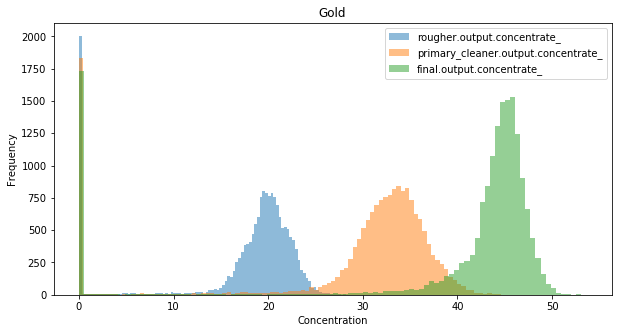

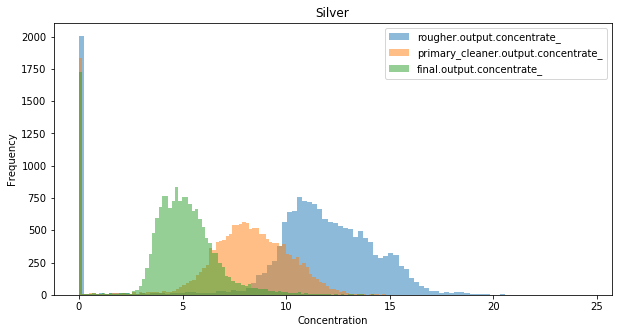

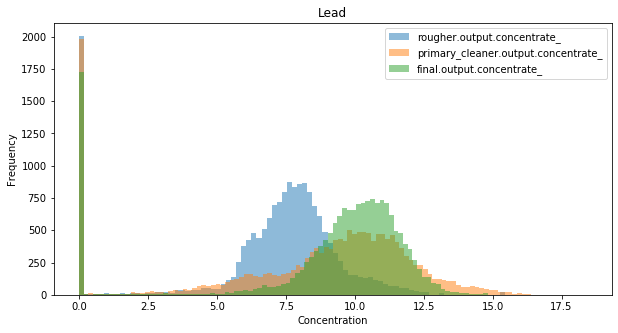

In [50]:
metals =  ['Gold', 'Silver', 'Lead']
symbols = ['au', 'ag', 'pb']
stages = ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', \
          'final.output.concentrate_']

for i in range(3):
    plt.figure(figsize=(10, 5))
    for stage in stages:
        plt.hist(df_train[stage+symbols[i]], bins=100, \
                       label=stage, alpha=0.5)
    
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')
    plt.title(metals[i])
    plt.legend()
    plt.show()

In general, it looks like we have a lot of outliers around zero.

Gold: Purification process looks good, although there is a little overlap between the stages.

Silver: Something looks strange here.The concentration decreased along the stages and we also have overlap.

Lead: It looks messy, we have a lot of overlap between stages.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Yep, very good! Not sure why the decrease of silver concentration looks strange to you: as the goal of the process is purification of gold (i.e. increasing its concentration), the decrease of concentration of another element seems natural
	  
</div>

<div class="alert alert-info">
  I wrongly thought that the purification process is not just for gold, but for all metals...
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok! Yeah, this project can be a bit confusing!
	  
</div>

#### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

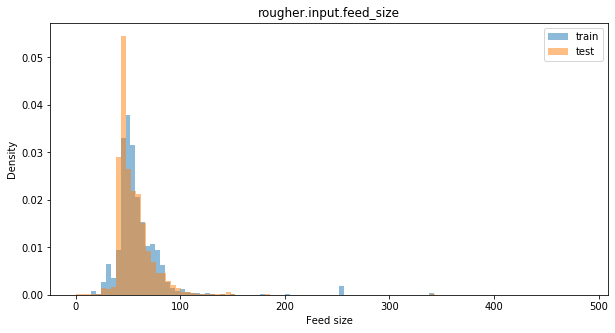

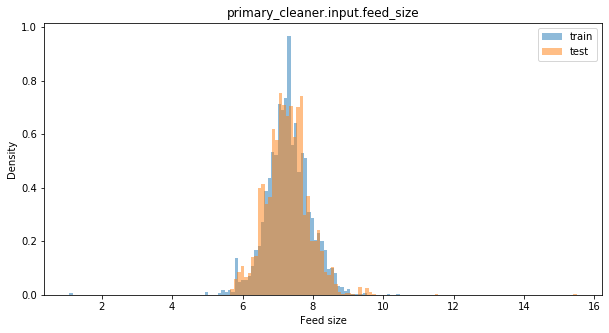

In [51]:
inputs = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

for i in range(2):
    plt.figure(figsize=(10, 5))
    plt.hist(df_train[inputs[i]], bins=100, label='train', alpha=0.5, density=True )
    plt.hist(df_test[inputs[i]], bins=100, label='test', alpha=0.5, density=True )

    plt.xlabel('Feed size')
    plt.ylabel('Density')
    plt.title(inputs[i])
    plt.legend()
    
plt.show()

The distributions  of feed particle size in train and test sets look similar.

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
For comparison of distributions it's better to use densities, not absolute values (the easiest way to achieve that is using `density=True` parameter of `plt.hist()`)
	  
</div>

<div class="alert alert-info">
  Corrected :)
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Awesome!
	  
</div>

#### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. 
* Do you notice any abnormal values in the total distribution? 
* If you do, is it worth removing such values from both samples?
* Describe the findings and eliminate anomalies.

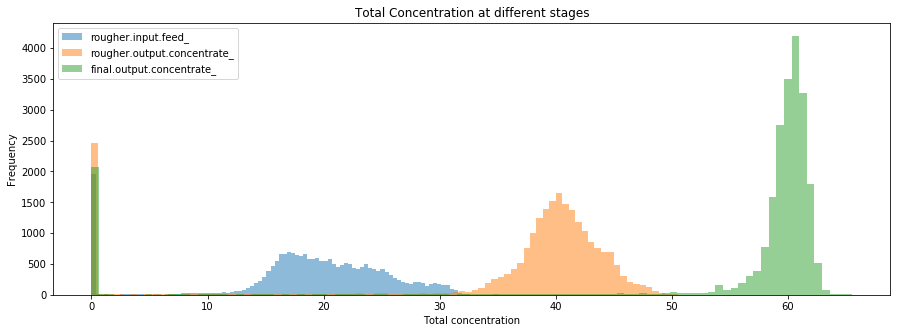

In [52]:
stages = ['rougher.input.feed_', 'rougher.output.concentrate_', 'final.output.concentrate_']

plt.figure(figsize=(15, 5))

for stage in stages:
    total = df_full[stage+'au'] + df_full[stage+'ag'] + df_full[stage+'pb']
    plt.hist(total, bins=100, label=stage, alpha=0.5)
    
plt.xlabel('Total concentration')
plt.ylabel('Frequency')
plt.title('Total Concentration at different stages')
plt.legend()
plt.show()

As we said before, we can see a lot of ouliers around zero at different stages. We should remove these values.

##### Removing outliers

In [53]:
df_train = df_train.loc[(df_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1) > 10) \
           & (df_train[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']].sum(axis=1) > 10)\
           & (df_train[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']].sum(axis=1) > 10)] 

df_test = df_test.loc[df_test[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1) > 10] 


No outliers.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Anomalous values were detected and removed
	  
</div>

### Build the model
#### Write a function to calculate the final sMAPE value.

##### evaluation metrics formulas
![Alt text](https://pictures.s3.yandex.net/resources/smape_1576239058_1589899769.jpg) 
![Alt text](https://pictures.s3.yandex.net/resources/_smape_1_1589900649.jpg) 


In [54]:
def smape(target, predictions):
    numerator = np.abs(target - predictions)
    denominator = (np.abs(target) + np.abs(predictions))/ 2
    return ((numerator / denominator).mean())*100

def final_smape(target, predictions):
    rougher = smape(target[:,0], predictions[:,0])
    final = smape(target[:,1], predictions[:,1])
    return  0.25* rougher + 0.75* final

smape_scorer = make_scorer(final_smape, greater_is_better=False)

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Smape functions and scorer initialization are correct
	  
</div>

#### Train different models. 
* Evaluate them using cross-validation. 
* Pick the best model and test it using the test sample. 
* Provide findings.

Let's eliminate the different columns between the train and test sets:

In [55]:
df_train = df_train.drop(diff, axis=1)

In [56]:
df_train.columns.difference(df_test.columns)

Index([], dtype='object')

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Good!
	  
</div>

Now we have to merge the target columns into the train and test sets:

In [57]:
target_cols = df_full[['final.output.recovery', 'rougher.output.recovery', 'date']]

df_test = df_test.merge(target_cols, on='date', how='left')
df_train = df_train.merge(target_cols, on='date', how='left')

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Targets merged with the test set correctly
	  
</div>

We don't need the date column so we'll drop it:

In [58]:
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)

##### Features and Target Split

In [59]:
features_train = df_train.drop(columns=['rougher.output.recovery' , 'final.output.recovery'], axis=1)
target_train = df_train[['rougher.output.recovery' , 'final.output.recovery' ]]

features_test = df_test.drop(columns=['rougher.output.recovery' , 'final.output.recovery'], axis=1)
target_test = df_test[['rougher.output.recovery' , 'final.output.recovery' ]]

Features and targets split correctly.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great!
	  
</div>

##### Scaling

In [63]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_train = pd.DataFrame(features_train)

scaler = StandardScaler()
features_test = scaler.fit_transform(features_test)
features_test = pd.DataFrame(features_test)
features_test.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.827068,2.000968,1.327599,-0.561481,-1.219013,-0.150837,-1.209421,-0.003071,-1.045225,-0.129681,...,-1.228686,0.232170,-1.660458,-0.441875,-1.611457,3.831784,-1.748340,-0.134609,2.088638,0.044746
1,0.927947,1.999187,1.327599,-0.583850,-1.220770,-0.142734,-1.218415,0.001128,-1.077864,-0.065321,...,-1.218816,0.203440,-1.627258,-0.422552,-1.607570,-1.371098,-1.746124,-0.138051,1.715023,0.041953
2,0.925036,1.335875,0.849998,-0.575282,-1.223225,-0.181813,-1.211770,0.001533,-1.061968,-0.193290,...,-1.246148,0.201150,-1.637157,-0.436484,-1.570119,0.021835,-1.736942,-0.128852,1.709466,0.021568
3,0.926712,1.058841,0.611197,-0.778999,-1.213513,-0.085200,-1.223494,0.017952,-1.045008,-0.026451,...,-1.225965,0.214449,-1.643531,-0.420686,-1.627887,0.018117,-1.727759,-0.132575,1.699285,0.070113
4,0.569975,0.641057,0.432097,-0.868061,-1.199261,-0.178919,-1.217809,0.009245,-1.028135,-0.134350,...,-1.228169,0.136693,-1.649417,-0.431464,-1.557888,-0.463564,-1.718577,-0.143497,1.711343,0.015635


Scaling looks good.

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Scaling is applied correctly for the case when we only fit the model using the train set and then evaluate it on the test set. However, it is not quite correct for cross-validation: in each fold, the train subset will have implicit knowledge about the validation subset due to scaling being applied to the whole train set used for cross-validation. The proper way to use scaling with cross-validation is using [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).
	  
</div>

<div class="alert alert-info">
  Thanks, I'll try it next time :)
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok!
	  
</div>

##### Linear Regression

In [64]:
model = LinearRegression()
model.fit(features_train, target_train)

predictions = model.predict(features_test)
predictions = pd.DataFrame(predictions)

print('The Linear Regression sMAPE score is {:.3f}'.format(final_smape(target_test.values, predictions.values)))

The Linear Regression sMAPE score is 10.963


In [65]:
scores = cross_val_score(model, features_train.values, target_train.values, cv=5, scoring=smape_scorer)
print('The CV sMAPE score for the Linear Regression model is {:.3f}'.format(abs(scores.mean())))

The CV sMAPE score for the Linear Regression model is 10.254


##### Decision Tree Regressor

In [33]:
parameters = {'max_depth': [20, 30, 40], 'min_samples_leaf': [4,6,8]}

In [34]:
model = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, scoring=smape_scorer)
model.fit(features_train.values, target_train.values)

print(model.best_estimator_)
print('Best score: {:.3f}'.format(abs(model.best_score_)))

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
Best score: 12.631


In [35]:
model = DecisionTreeRegressor(max_depth=20, min_samples_leaf=8)
model.fit(features_train, target_train)

predictions = model.predict(features_test)
predictions = pd.DataFrame(predictions)

print('The Decision Tree Regressor sMAPE score is {:.3f}'.format(final_smape(target_test.values, predictions.values)))

The Decision Tree Regressor sMAPE score is 13.242


In [36]:
scores = cross_val_score(model, features_train.values, target_train.values, cv=5, scoring=smape_scorer)
print('The CV sMAPE score for the Decision Tree Regressor model is {:.3f}'.format(abs(scores.mean())))

The CV sMAPE score for the Decision Tree Regressor model is 13.061


##### Random Forest Regressor

In [37]:
parameters = {'n_estimators': [15,25,50],\
             'max_depth': [5,10,15],\
             'min_samples_split':[5,10,15],\
             'min_samples_leaf': [4,6,8]}

In [38]:
model = GridSearchCV(RandomForestRegressor(), parameters, cv=5, scoring=smape_scorer)
model.fit(features_train.values, target_train.values)

print(model.best_estimator_)
print('Best score: {:.3f}'.format(abs(model.best_score_)))

KeyboardInterrupt: 

In [ ]:
model = RandomForestRegressor(n_estimators=15, max_depth=5, min_samples_split=15, min_samples_leaf=4)
model.fit(features_train, target_train)

predictions = model.predict(features_test)
predictions = pd.DataFrame(predictions)

print('The Random Forest Regressor sMAPE score is {:.3f}'.format(final_smape(target_test.values, predictions.values)))

In [ ]:
scores = cross_val_score(model, features_train.values, target_train.values, cv=5, scoring=smape_scorer)
print('The CV sMAPE score for the Random Forest Regressor model is {:.3f}'.format(abs(scores.mean())))

##### Dummy Regressor

In [66]:
model = DummyRegressor(strategy="mean")
model.fit(features_train, target_train)

predictions = model.predict(features_test)
predictions = pd.DataFrame(predictions)
print('The Dummy Regressor sMAPE score is {:.3f}'.format(final_smape(target_test.values, predictions.values)))

The Dummy Regressor sMAPE score is 10.558


In [67]:
scores = cross_val_score(model, features_train.values, target_train.values, cv=5, scoring=smape_scorer)
print('The CV sMAPE score for the Dummy Regressor model is {:.3f}'.format(abs(scores.mean())))

The CV sMAPE score for the Dummy Regressor model is 9.902


##### Conclusion
The Random Forest Regressor model has the best sMAPE score. I have to notice that the dummy model's score is not bad at all...

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Great, you trained a couple of different models and tuned their hyperparameters using a cross-validated grid search. Due to the problem that missing targets were filled, the scores are not quite reliable though. Also, please add a simple baseline, e.g. a constant model always predicting the train target mean or median (it's convenient to use [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html))
	  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok, great, now everything looks good!
	  
</div>